### The solution is divided into the following sections:

###### Data understanding and exploration
###### Data cleaning
###### Data preparation
###### Model building and evaluation

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model,metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
 
import os

#hide warnings
import warnings
warnings.filterwarnings('ignore')



### Data understanding and exploration

In [83]:
# reading the dataset
house = pd.read_csv("train.csv")

In [84]:
# size of the dataset
house.shape

(1460, 81)

In [85]:
# summary of the dataset:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
#checking for null values in dataset
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Data cleaning
Let's now conduct some data cleaning steps. 

In [88]:
#Drop the columns with all Null values
house = house.dropna(axis=1,how="all")

In [89]:
house.shape

(1460, 81)

In [90]:
#Delete columns having all values as same
nunique = house.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
house = house.drop(cols_to_drop, axis=1)

In [91]:
house.shape

(1460, 81)

In [92]:
#find the percentage of missing data columnwise
((house.isnull().sum() * 100 / len(house)).sort_values(ascending=False)).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [93]:
# delete columns contains most missing data: here PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
house = house.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1)

In [94]:
house.shape

(1460, 75)

##### check the mode of  categorical variables

In [95]:
house.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [96]:
house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [97]:
house.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [98]:
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [99]:
house.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [100]:
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [101]:
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [102]:
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [103]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [104]:
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [105]:
house.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [106]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

##### Imputing missing value

In [107]:
house.GarageCond.fillna('TA',inplace=True)
house.GarageType.fillna('Attchd',inplace=True)
house.GarageYrBlt.fillna('No',inplace=True)    
house.GarageFinish.fillna('Unf',inplace=True)
house.GarageQual.fillna('TA',inplace=True)
house.BsmtExposure.fillna('No',inplace=True)
house.BsmtFinType1.fillna('Unf',inplace=True)
house.BsmtFinType2.fillna('Unf',inplace=True)
house.BsmtCond.fillna('TA',inplace=True)
house.BsmtQual.fillna('TA',inplace=True)
house.MasVnrArea.fillna(house.MasVnrArea.mean(),inplace=True)
house.MasVnrType.fillna('None',inplace=True)
house.Electrical.fillna('SBrkr',inplace=True)

In [108]:
((house.isnull().sum() * 100 / len(house)).sort_values(ascending=False)).head(20)

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
RoofStyle       0.0
YearBuilt       0.0
TotalBsmtSF     0.0
dtype: float64

In [109]:
# Id' column is of no use for our analysis hence dropping the column
house = house.drop('Id',axis=1)

In [110]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


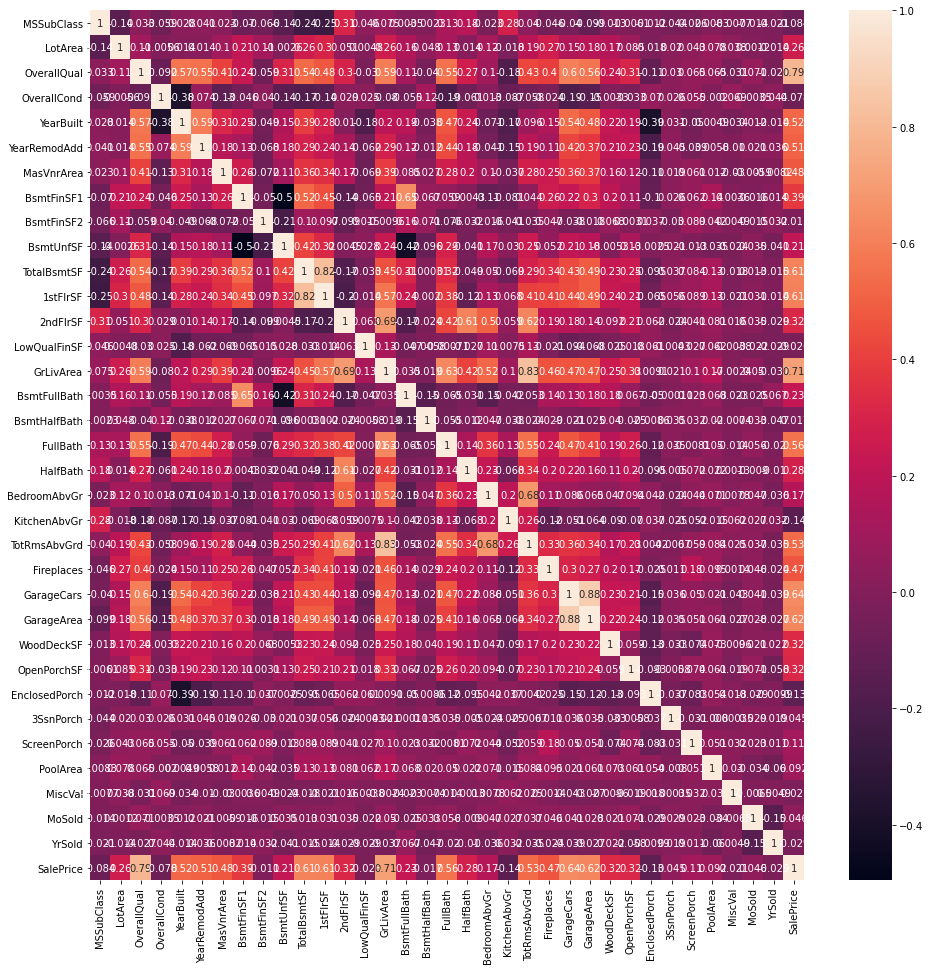

In [111]:
#plot heatmap to check the corellation between variables
plt.figure(figsize=(16,16))
sns.heatmap(house[list(house.dtypes[house.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [112]:
#1stFlrSF&TotalBsmtSF, TotRmsAbvGrd&GrLivArea, GarageArea&GarageCars attributes are highly correlated. so remove one
house = house.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1)

In [113]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [114]:
# Drop the columns that have more than 90% values associated to a specific value
x=[]
for col in house:
    if(house[col].value_counts().max() >= 1314):
        x.append(col)
house.drop(x,axis=1,inplace=True)


In [115]:
house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,RFn,2,0,61,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,RFn,2,298,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,RFn,2,0,42,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,...,Unf,3,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,...,RFn,3,192,84,0,12,2008,WD,Normal,250000


In [116]:
# Create a new column called 'IsRemodelled' is the difference between remodelled and built years
def rem(x):
    if(x['YearBuilt'] == x['YearRemodAdd']):
        return 'No'
    else:
        return 'Yes'
    
house['IsRemodelled'] = house.apply(rem, axis=1)

In [117]:
# Create a new column named 'BuildingAge' which tells the age of the building at the time of selling
       
house['BuildingAge'] = house['YrSold'] - house['YearBuilt']

In [118]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold.  we can drop these columns

house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

In [119]:
# Handling Outliers for numerical variables by taking the lower and upper quantile as 0.25 & 0.90 respectively
col1 = list(house.dtypes[house.dtypes !='object'].index)
col1

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'SalePrice',
 'BuildingAge']

In [120]:
def drop_outliers(x):
    list = []
    for y in col1:
        Q1 = x[y].quantile(.25)
        Q3 = x[y].quantile(.90)
        IQR = Q3-Q1
        x =  x[(x[y] >= (Q1-(1.5*IQR))) & (x[y] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

In [121]:
house.shape

(1289, 50)

In [122]:
# displaying all the numerical variables
house[list(house.dtypes[house.dtypes!='object'].index)].head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,BuildingAge
0,60,8450,7,5,196.0,706,0,150,856,854,...,1,3,0,2,0,61,0,2,208500,5
1,20,9600,6,8,0.0,978,0,284,1262,0,...,0,3,1,2,298,0,0,5,181500,31
2,60,11250,7,5,162.0,486,0,434,920,866,...,1,3,1,2,0,42,0,9,223500,7
3,70,9550,7,5,0.0,216,0,540,756,756,...,0,3,1,3,0,35,272,2,140000,91
4,60,14260,8,5,350.0,655,0,490,1145,1053,...,1,4,1,3,192,84,0,12,250000,8


In [123]:
num1 = house[list(house.dtypes[house.dtypes!='object'].index)].head(100)

In [124]:
#Let's make a pairplot of all the numeric variables
#sns.pairplot(num1)
#plt.show()

In [125]:
# displaying all the categorical variables
house[list(house.dtypes[house.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SaleType,SaleCondition,IsRemodelled
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,Attchd,2003,RFn,WD,Normal,No
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,...,ALQ,Unf,Ex,TA,Attchd,1976,RFn,WD,Normal,No
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,Attchd,2001,RFn,WD,Normal,Yes
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,...,ALQ,Unf,Gd,Gd,Detchd,1998,Unf,WD,Abnorml,Yes
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,Attchd,2000,RFn,WD,Normal,No


In [126]:
house.ExterQual

0       Gd
1       TA
2       Gd
3       TA
4       Gd
5       TA
6       Gd
7       TA
8       TA
9       TA
10      TA
11      Ex
12      TA
13      Gd
14      TA
15      TA
16      TA
17      TA
18      TA
19      TA
20      Gd
21      TA
22      Gd
23      TA
25      Gd
27      Gd
28      TA
29      TA
30      TA
31      TA
32      Gd
33      TA
34      Ex
35      Gd
36      TA
37      TA
38      TA
39      TA
40      TA
41      TA
42      TA
45      Ex
46      Gd
47      Gd
48      TA
49      TA
50      TA
51      TA
54      TA
55      TA
56      Gd
57      Gd
59      TA
60      TA
61      TA
62      Gd
63      TA
64      TA
65      Gd
66      TA
67      Gd
68      TA
69      Gd
71      TA
72      TA
74      Gd
75      TA
76      TA
77      TA
78      TA
79      TA
80      TA
81      TA
82      TA
83      TA
84      TA
85      Gd
86      Gd
87      Gd
88      Fa
89      TA
90      TA
91      TA
92      TA
93      TA
94      TA
95      Ex
96      Gd
97      TA
98      TA
99      TA

In [127]:
cat1 = house[list(house.dtypes[house.dtypes=='object'].index)].head(100)

In [128]:
#Here some categorical variables has order. so replace them with order values
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtQual'] = house.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['GarageFinish'] = house.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house['IsRemodelled'] = house.IsRemodelled.map({'Yes':1,'No':0})

In [129]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1457
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1289 non-null   int64  
 1   MSZoning       1289 non-null   object 
 2   LotArea        1289 non-null   int64  
 3   LotShape       1289 non-null   int64  
 4   LandContour    1289 non-null   object 
 5   LotConfig      1289 non-null   object 
 6   Neighborhood   1289 non-null   object 
 7   Condition1     1289 non-null   object 
 8   BldgType       1289 non-null   object 
 9   HouseStyle     1289 non-null   object 
 10  OverallQual    1289 non-null   int64  
 11  OverallCond    1289 non-null   int64  
 12  RoofStyle      1289 non-null   object 
 13  Exterior1st    1289 non-null   object 
 14  Exterior2nd    1289 non-null   object 
 15  MasVnrType     1289 non-null   object 
 16  MasVnrArea     1289 non-null   float64
 17  ExterQual      1289 non-null   int64  
 18  ExterCon

### Data preparation

In [130]:
# Now Create dummy variables to the remaining categorical variables
dummy = pd.get_dummies(house[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType','GarageYrBlt','SaleType','SaleCondition']],
                           drop_first=True)

house = pd.concat([house,dummy],axis=1)

house = house.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType','GarageYrBlt','SaleType','SaleCondition'],axis=1)

In [131]:
house.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,7,5,196.0,3,2,4,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,6,8,0.0,2,2,4,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,7,5,162.0,3,2,4,2,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,7,5,0.0,2,2,3,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,8,5,350.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


In [132]:
# scaling the features - necessary before using Ridge or Lasso
cols = house.columns
scaler = MinMaxScaler()
house[cols] = scaler.fit_transform(house[cols])


In [133]:
house.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.320700,1.0,0.666667,0.428571,0.248731,0.666667,0.5,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.372281,1.0,0.555556,0.857143,0.000000,0.333333,0.5,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.446288,0.0,0.666667,0.428571,0.205584,0.666667,0.5,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.370038,0.0,0.666667,0.428571,0.000000,0.333333,0.5,0.333333,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.581296,0.0,0.777778,0.428571,0.444162,0.666667,0.5,0.666667,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


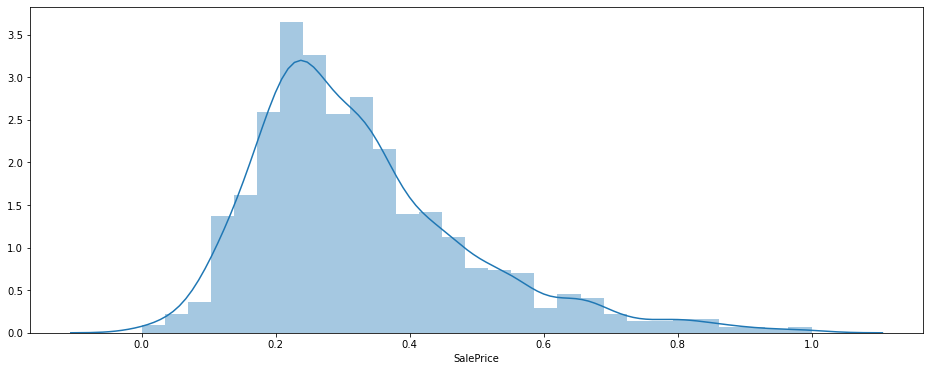

In [134]:
# Let us check the distribution of our target variable after scaling
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

In [135]:
# Spliting the dependent and independent variable
y = house.pop('SalePrice')
X = house

In [136]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

#### Linear Regression

In [137]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [138]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.2011557148143669
[-4.03599726e-02  8.57770015e-02  7.17086168e-03  1.19936267e-01
  1.09933005e-01  3.27789489e-02  3.93842401e-02 -3.81406864e-02
  3.43520430e-02  3.05406905e-02  5.21262154e-03  9.31222313e+10
 -5.30863194e-03  1.42848745e+10  1.16497481e+11 -1.42469980e+11
  1.26961796e-02  3.64756500e-02  3.75751664e-01  7.21267895e-03
  7.31709244e-03  1.11419372e-02 -5.01445001e-02  4.10539745e-02
  7.61685734e-03  8.08443868e-03  7.97880208e-02  2.14033341e-02
  2.96917793e-02  6.88356484e-03 -5.67397900e-03 -5.03980760e-03
 -1.07645584e-01  1.22757701e-02  2.80972125e-03 -3.17700453e-03
 -1.22780062e-02  1.73473250e-03 -1.13641810e-02 -7.32161999e-03
  1.18864365e-02 -2.80907038e-02 -4.16241195e-02 -2.96710383e-03
 -2.74943964e-02  4.47521908e-02 -8.62181629e-03 -4.49935022e-02
 -4.22559079e-02  2.91926258e-03 -4.56438509e-02 -4.99340485e-02
 -3.89473797e-02  2.41108071e-02 -3.96923660e-02 -4.03637812e-02
  4.81764135e-02 -4.62104066e-02  2.22997079e-02  5.08950232e-02
 -3.3

In [139]:
X_train.shape

(902, 242)

In [140]:
X_test.shape

(387, 242)

In [141]:
y_train.shape

(902,)

###### # Lets check R2,rss,mse values for both the train and test data by using Linear regression

In [142]:
#R2 value of train data=91.84 and test data= -4.10. It clearly shows high overfitting.So lets apply Regualarization
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9420572862266112
-7.170557218757833e+17
1.4061345398914529
6.888518117048616e+18
0.0015589074721634733
1.7799788416146294e+16


### Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [143]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5,0.52,0.54,0.56,0.58, 0.6, 0.61,0.62,0.64,0.66,0.68,0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6,
                                   0.61, 0.62, 0.64, 0.66, 0.68, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [145]:
#Fitting Ridge model for alpha = 3.0 and printing coefficients which have been penalised
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.04700289  0.07306231  0.00279153  0.11533126  0.07473582  0.03970179
  0.04598213 -0.02021391  0.0492248   0.03913588  0.00639943  0.08400623
  0.00540832 -0.00095343  0.03092669  0.08010185  0.01395135  0.06603639
  0.18387295  0.01001159  0.03515961  0.02022998 -0.0125602   0.05641125
  0.02038081  0.01267432  0.07276787  0.01913377  0.02950135  0.00291973
 -0.00616816 -0.00111226 -0.04986087  0.01182353  0.01008807  0.01507105
  0.00054431  0.00299336 -0.00997437 -0.00793295  0.01702116 -0.02444876
 -0.01305992 -0.00389764 -0.00332673  0.0313253   0.00799222 -0.01221699
 -0.02593478  0.02292504 -0.02765181 -0.03992284 -0.01551558 -0.00465194
 -0.02888508 -0.02388762  0.0251407  -0.02503185  0.04509422  0.06005314
 -0.01735119 -0.01107553 -0.01261641 -0.01109359 -0.0031652   0.0631191
 -0.01384255  0.00190929  0.00506921  0.01966822  0.02130784  0.02428397
 -0.01528542  0.00603623 -0.00214853  0.01682517 -0.00207938 -0.02255243
 -0.04035633 -0.02407283 -0.0020959   0.00343587 -0.

In [146]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9330102475918763
0.9105831671542377
1.6256850697093301
0.8589980586388
0.0018023116072165522
0.0022196332264568476


### Lasso Regression

In [147]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6,
                                   0.61, 0.62, 0.64, 0.66, 0.68, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [149]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [150]:
lasso.coef_

array([-5.25384156e-02,  7.08505698e-02,  2.30515319e-03,  1.42995255e-01,
        9.65497628e-02,  3.79498208e-02,  4.08678849e-02, -1.74421502e-02,
        3.90075128e-02,  3.61409811e-02,  3.61506961e-03,  6.55431445e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.34326146e-02,
        5.29645691e-03,  0.00000000e+00,  3.76203743e-01,  7.55638018e-03,
        3.75096403e-03,  9.12207038e-03, -3.55260925e-02,  4.70770989e-02,
        1.20032603e-02,  4.77379039e-03,  7.10623600e-02,  1.20672689e-02,
        3.07651924e-02,  3.26230633e-03, -6.45480297e-03, -1.88120536e-03,
       -9.52535638e-02,  2.78371397e-03,  0.00000000e+00,  2.37409282e-03,
       -1.11565328e-02,  1.53647463e-03, -3.66269185e-03, -5.86113188e-03,
        1.40892014e-02, -1.37603603e-02, -0.00000000e+00, -5.18041962e-04,
        0.00000000e+00,  3.27401445e-02,  1.97997628e-02, -0.00000000e+00,
       -1.34998789e-02,  2.95910063e-02, -1.27328398e-02, -2.01313970e-02,
       -0.00000000e+00,  

In [151]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9333178513946608
0.9151371924739323
1.6182202427530235
0.8152490375192831
0.001794035745845924
0.0021065866602565458


In [152]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.420573e-01,0.933010,0.933318
1,R2 Score (Test),-7.170557e+17,0.910583,0.915137
2,RSS (Train),1.406135e+00,1.625685,1.618220
3,RSS (Test),6.888518e+18,0.858998,0.815249
4,MSE (Train),3.948300e-02,0.042454,0.042356
5,MSE (Test),1.334158e+08,0.047113,0.045898


##### Lets observe the changes in the coefficients after regularization

In [153]:
betas = pd.DataFrame(index=X_train.columns)

In [154]:
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [155]:
pd.set_option('display.max_rows', None)
coeff1 = betas.sort_values(by=['Ridge'],ascending=False).head(10)
coeff1

,Linear,Ridge,Lasso
GrLivArea,3.757517e-01,0.183873,0.376204
OverallQual,1.199363e-01,0.115331,0.142995
BsmtFinSF1,9.312223e+10,0.084006,0.065543
TotalBsmtSF,-1.424700e+11,0.080102,0.053433
OverallCond,1.099330e-01,0.074736,0.096550
LotArea,8.577700e-02,0.073062,0.070851
GarageCars,7.978802e-02,0.072768,0.071062
2ndFlrSF,3.647565e-02,0.066036,0.000000
Neighborhood_StoneBr,6.632269e-02,0.063119,0.072171
Neighborhood_NridgHt,5.089502e-02,0.060053,0.066063


In [156]:
pd.set_option('display.max_rows', None)
coeff2 = betas.sort_values(by=['Lasso'],ascending=False).head(10)
coeff2

,Linear,Ridge,Lasso
GrLivArea,3.757517e-01,0.183873,0.376204
OverallQual,1.199363e-01,0.115331,0.142995
OverallCond,1.099330e-01,0.074736,0.096550
SaleType_CWD,1.469557e-01,0.052572,0.094059
Neighborhood_StoneBr,6.632269e-02,0.063119,0.072171
GarageCars,7.978802e-02,0.072768,0.071062
LotArea,8.577700e-02,0.073062,0.070851
Neighborhood_NridgHt,5.089502e-02,0.060053,0.066063
BsmtFinSF1,9.312223e+10,0.084006,0.065543
GarageYrBlt_2008.0,1.763886e-01,0.050753,0.056161


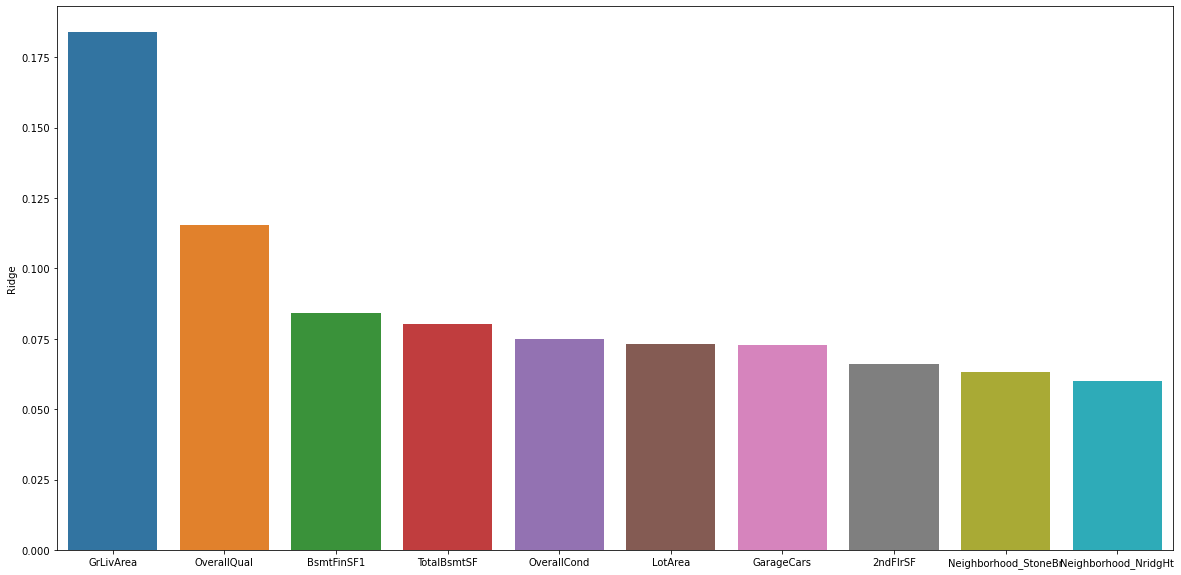

In [157]:
#bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,10))
sns.barplot(y = coeff1['Ridge'], x=coeff1.index)
plt.show()

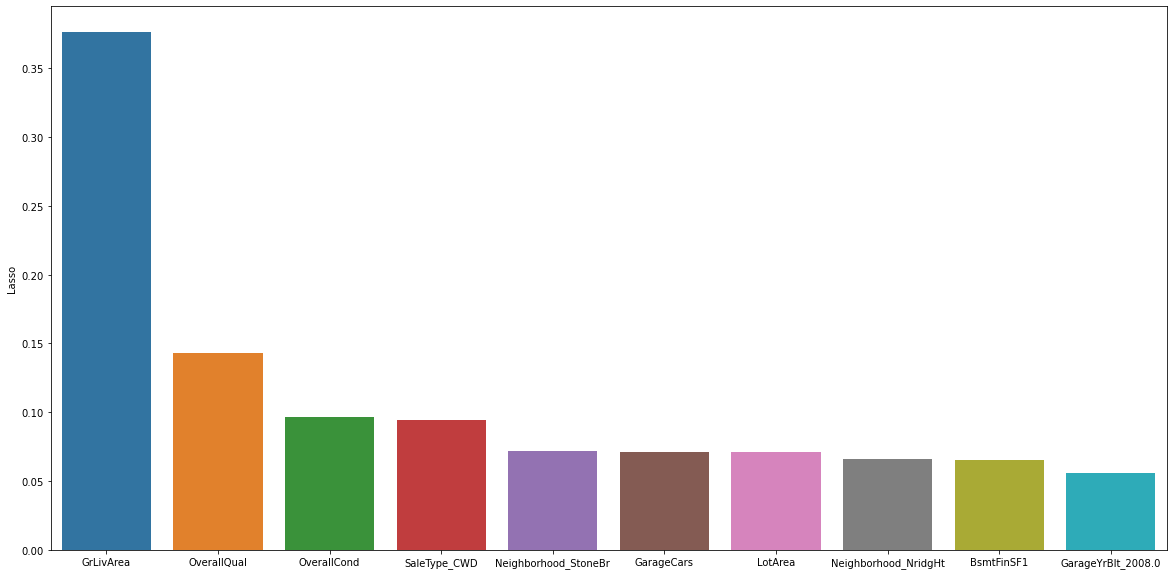

In [158]:
#bar plot to determine the variables that would affect pricing most using Lasso regression
plt.figure(figsize=(20,10))
sns.barplot(y = coeff2['Lasso'], x=coeff2.index)
plt.show()

### Conclusion :

The optimal lambda values are:

Ridge - 3.0

Lasso - 0.0001

R2_score is almost same in both the Ridge and Lasso.

RSS and MSE values of Lasso is slightly lower than that of Ridge.

Also, Lasso helps in feature reduction

##### Hence based on Lasso, the top 8 factors that generally affect the price are:

ground living area square feet, Overall material and finish of the house, Overall condition of the house, sale type of Warranty Deed - Cash, Physical locations at Northridge Heights, Size of garage in car capacity, Lot size.


### Lets double the alpha value and observe the changes

#### Ridge Regression

In [159]:
#Fitting Ridge model for alpha = 6.0 and printing coefficients which have been penalised
alpha = 6.0
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)
print(ridge1.coef_)

[-4.38062432e-02  6.53688094e-02  9.39594017e-04  1.02611965e-01
  6.16286270e-02  4.17015832e-02  4.84311703e-02 -1.36278779e-02
  5.15688588e-02  4.12492632e-02  8.08835300e-03  7.80756908e-02
  6.02087732e-03 -1.62118098e-03  3.11104710e-02  7.63088174e-02
  1.56741678e-02  5.98692320e-02  1.44535888e-01  1.16357154e-02
  3.96040412e-02  2.25778543e-02  4.61825295e-04  5.88405994e-02
  2.57498992e-02  1.52026990e-02  6.79875096e-02  1.93051193e-02
  2.87067931e-02  2.23132388e-03 -4.89790594e-03  5.08883386e-04
 -3.63308581e-02  7.32828092e-03  6.75274601e-03  1.49577009e-02
 -3.02427032e-03  4.26976899e-03 -6.90979041e-03 -8.24782813e-03
  1.68505489e-02 -2.18455370e-02 -7.19717979e-03 -4.58181858e-03
 -1.76102981e-03  2.30515384e-02  8.21510353e-03 -6.33846106e-03
 -2.27931466e-02  2.33738359e-02 -2.52267034e-02 -3.91006497e-02
 -1.30592062e-02 -1.11612881e-02 -2.54173158e-02 -2.19789235e-02
  1.67102799e-02 -1.94234621e-02  4.60332820e-02  5.91658870e-02
 -1.48638906e-02 -8.85018

In [160]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train1 = ridge1.predict(X_train)
y_pred_test1 = ridge1.predict(X_test)

metric4 = []
r2_train_lr1 = r2_score(y_train, y_pred_train1)
print(r2_train_lr1)
metric4.append(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test1)
print(r2_test_lr1)
metric4.append(r2_test_lr1)

rss1_lr1 = np.sum(np.square(y_train - y_pred_train1))
print(rss1_lr1)
metric4.append(rss1_lr1)

rss2_lr1 = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr1)
metric4.append(rss2_lr1)

mse_train_lr1 = mean_squared_error(y_train, y_pred_train1)
print(mse_train_lr1)
metric4.append(mse_train_lr1**0.5)

mse_test_lr1 = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr1)
metric4.append(mse_test_lr1**0.5)

0.9263860695542235
0.9059312195976315
1.7864384229879247
0.9036877864320798
0.001980530402425637
0.00233511055925602


##### Lasso Regression

In [161]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0002

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [162]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train1 = lasso1.predict(X_train)
y_pred_test1 = lasso1.predict(X_test)

metric5 = []
r2_train_lr1 = r2_score(y_train, y_pred_train1)
print(r2_train_lr1)
metric5.append(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test1)
print(r2_test_lr1)
metric5.append(r2_test_lr1)

rss1_lr1 = np.sum(np.square(y_train - y_pred_train1))
print(rss1_lr1)
metric5.append(rss1_lr1)

rss2_lr1 = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr1)
metric5.append(rss2_lr1)

mse_train_lr1 = mean_squared_error(y_train, y_pred_train1)
print(mse_train_lr1)
metric5.append(mse_train_lr1**0.5)

mse_test_lr1 = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr1)
metric5.append(mse_test_lr1**0.5)

0.9263526640205603
0.9131030459048847
1.7872490973876631
0.8347904135464643
0.0019814291545317774
0.0021570811719546883


In [163]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.420573e-01,0.926386,0.926353
1,R2 Score (Test),-7.170557e+17,0.905931,0.913103
2,RSS (Train),1.406135e+00,1.786438,1.787249
3,RSS (Test),6.888518e+18,0.903688,0.834790
4,MSE (Train),3.948300e-02,0.044503,0.044513
5,MSE (Test),1.334158e+08,0.048323,0.046444


#### Observe the changes in the coefficients after double the Alpha value

##### Ridge Regression

In [165]:
betas1 = pd.DataFrame(index=X_train.columns)

In [167]:
betas1.rows = X_train.columns
betas1['Ridge1'] = ridge1.coef_
betas1['Lasso1'] = lasso1.coef_

In [168]:
pd.set_option('display.max_rows', None)
coeff3 = betas1.sort_values(by=['Ridge1'],ascending=False).head(10)
coeff3

,Ridge1,Lasso1
GrLivArea,0.144536,0.361874
OverallQual,0.102612,0.160133
BsmtFinSF1,0.078076,0.071409
TotalBsmtSF,0.076309,0.043084
GarageCars,0.067988,0.068179
LotArea,0.065369,0.061577
OverallCond,0.061629,0.082340
2ndFlrSF,0.059869,0.000000
Neighborhood_NridgHt,0.059166,0.065072
KitchenQual,0.058841,0.049395


### create another model excluding the five most important predictor variables

In [171]:
X_train_Newmodel=X_train.drop(['GrLivArea','OverallQual','OverallCond','SaleType_CWD','Neighborhood_StoneBr'],axis=1)

In [173]:
X_train_Newmodel.shape

(902, 237)

In [176]:
X_test_Newmodel=X_test.drop(['GrLivArea','OverallQual','OverallCond','SaleType_CWD','Neighborhood_StoneBr'],axis=1)

In [177]:
X_test_Newmodel.shape

(387, 237)

#### Lasso Regression

In [178]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_Newmodel, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6,
                                   0.61, 0.62, 0.64, 0.66, 0.68, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [182]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_Newmodel, y_train)

Lasso(alpha=0.0001)

In [183]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso3.predict(X_train_Newmodel)
y_pred_test = lasso3.predict(X_test_Newmodel)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.9130436675962768
0.8783687689118791
2.1102274038002244
1.1684711709121418
0.002339498230377189
0.003019305351194165


In [184]:
#Lets observe the changes in the coefficients after excluding top 5 features
betas = pd.DataFrame(index=X_train_Newmodel.columns)

In [185]:
betas.rows = X_train_Newmodel.columns
betas['Lasso'] = lasso3.coef_

In [186]:
pd.set_option('display.max_rows', None)
coeff4 = betas.sort_values(by=['Lasso'],ascending=False).head(10)
coeff4

,Lasso
TotalBsmtSF,0.239777
2ndFlrSF,0.187222
KitchenQual,0.092014
LotArea,0.087775
GarageCars,0.084296
GarageYrBlt_1934.0,0.074682
SaleCondition_Alloca,0.073661
ExterQual,0.072411
BsmtFinSF1,0.072238
GarageYrBlt_2010.0,0.060787


The optimal lambda values are:

Ridge - 3.0
Lasso - 0.0001


R2_score is almost the same in both the Ridge and Lasso.
RSS and MSE values of Lasso is slightly lower than that of Ridge.


Also, Lasso helps in feature reduction. So Lasso can be applied to choose significant variables for predicting the price of the house.


Hence based on Lasso, the top 8 factors that generally affect the price are:

ground living area square feet, Overall material and finish of the house, Overall condition of the house, sale type of Warranty Deed - Cash, Physical locations at Northridge Heights, Size of garage in car capacity, Lot size.
